In [1]:
from npeet import entropy_estimators as ee
from math import log, pi
import numpy as np
import numpy.random as nr
import random
import pandas as pd
from numpy.linalg import det
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import differential_entropy
import statsmodels.api as sm

In [2]:
import json
with open("./accelData.json", "r") as infile:
    data = json.load(infile)

In [3]:
pd_Data = pd.DataFrame()
veh = '1'
for i in range (len(data[veh])):
    list = data[veh][i][:50]
    pd_Data[str(i)] = list

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd_Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,[0.15470702059592334],[-0.0988447282612448],[0.06144599902304648],[0.02273111014750029],[-0.03256359302633349],[0.00961804480974493],[-0.02494843062706309],[0.009713274543132755],[-0.005326362653912398],[-0.0020551899214371616],[0.004925766924461783],[-0.00394828067503461],[0.001482942724830849],[-0.00020033041959521825],[-5.723918055977606e-05],[-0.0004768677337452232],[0.00023361435682822673],[0.00020020125933051247],[5.72437723356245e-05],[-4.293678131261913e-05],[-3.052803343450705e-08],[-4.7522599189164794e-08],[8.169926957179996e-09],[-8.079359403723174e-09],[-2.7617259590329013e-08],[-5.062358532370581e-08],[5.362235988570774e-08],[1.7004211372295686e-08],[-2.5457458363575824e-08],[-3.803932280277422e-08],[-1.1175060876666976e-08],[1.850744446585395e-08],[-1.878754929407478e-08],[-3.822663963148898e-08],[1.8969457116213562e-08],[-2.1043744524718022e-08],[-4.199002034965815e-08],[-3.841365447954104e-08],[2.3101387469637302e-08],[-6.764242499457396e-09],[-3.1562743529889303e-08],[-6.05818861743046e-08],[-2.5637243439291524e-08],[-1.9633938919128013e-08],[-2.874264382057845e-08],[-5.202914543644965e-08],[1.3053478298274968e-08],[-1.766060186980667e-08],[-2.3764155088201733e-08],[-4.414068222047263e-08],[-9.249983001780038e-08],[-1.82235559975652e-08],[-2.5735404918236782e-08],[1.1892660025658586e-05],[-7.186916972656832e-06],[-7.1824113589968874e-06],[1.6640135211964946e-05],[-7.193253090953533e-06],[-7.194520472708632e-06],[2.770545450836437e-06],[-7.169886937496983e-06],[-4.7357862609231915e-06],[-7.185086920991068e-06],[-7.111726718633804e-06],[-2.43546000699979e-06],[-9.569899082073619e-06],[-4.82090703357585e-06],[-2.4032172785126704e-06]
1,[0.17430525744764225],[-0.1235119330706258],[0.0853740099034539],[-0.006718725312975238],[-0.011577720563531457],[-0.0188925814549723],[-0.023179340109562574],[0.016656113756496893],[-0.01086727344939753],[0.0026609491483853276],[0.0016975380330652712],[-0.0037432387021674174],[0.00262736938283048],[-0.001120489540067382],[0.0008773678922668893],[-0.001025239744167905],[0.0006532387760049829],[-9.543430678604636e-05],[9.062523551151003e-05],[-5.723466849794079e-05],[3.334858719838962e-05],[-3.963486427949192e-08],[9.518216073090002e-06],[-1.4290277254858097e-05],[-2.742999605231944e-08],[-3.897874023550685e-08],[1.906308888521835e-08],[5.122721891126503e-07],[-1.9727535160996013e-08],[-3.3437990154538966e-08],[-5.315334838940089e-08],[4.971554901089803e-07],[-2.320301284441939e-08],[-3.51282114507967e-08],[1.079930811442864e-08],[-8.830962627826011e-09],[-7.890896824847005e-09],[-3.090084632617618e-08],[-1.0329834765343548e-08],[2.2077601968817362e-08],[-2.3766526524582332e-08],[-1.7846346622718556e-09],[4.582737744840415e-08],[-2.0291865965305078e-08],[-3.8888146036697435e-08],[-4.292099120561943e-08],[3.127145653536445e-08],[-8.830394193637403e-09],[-2.1604167343980407e-08],[-3.8131284796349973e-08],[9.203331430285289e-09],[-1.3902683448918651e-08],[-2.761448847365955e-08],[-4.793707057970664e-06],[-9.506911977652521e-06],[-7.1227564069076266e-06],[1.1953163290279178e-05],[-7.126323424699876e-06],[4.804357427445893e-06],[1.663759949810384e-05],[-7.169417841623726e-06],[-7.200104410465258e-06],[-9.499542921176385e-06],[7.139653503962506e-06],[1.4387496971579594e-05],[-7.116279636676381e-06],[1.2262947617358577e-05],[9.51403816173979e-06]
2,[0.11827144080586827],[-0.09623655564719336],[0.07435415830753023],[-0.038424037046143056],[0.010686056863749016],[-0.034738018635600554],[-0.010581142932588605],[0.017118644045712728],[-0.012345478205038063],[0.00692372828293486],[-0.0028229377875810258],[-0.0017929435373886804],[0.0027706201379729123],[-0.0017067742063403557],[0.0015640254285376187],[-0.0011969036355896634],[0.0008344441728524998],[-0.0004004318139472218],[9.060457596632432e-05],[-6.

In [26]:
veh = '0'

[(i,ee.entropy(data[veh][i][:50], k=3)) for i in range(len(data[veh]))]

[(0, 0.6859663426139172),
 (1, 0.6237420537638058),
 (2, 0.5339661843092572),
 (3, 0.7525708508724479),
 (4, 0.5316043655266043),
 (5, 0.5654648596940713),
 (6, 0.662603372727712),
 (7, 0.3333404948811966),
 (8, 0.3939947811952084),
 (9, 0.6418228299889699),
 (10, 1.2060475869265148),
 (11, 1.1209697960424483),
 (12, 1.3172582819243728),
 (13, 1.742294016832418),
 (14, 1.6134991300103203),
 (15, 1.9136932409923526),
 (16, 2.067985468006713),
 (17, 2.0067715136875774),
 (18, 0.9890473947515638),
 (19, 0.42566657794309504),
 (20, 0.18550876076990205),
 (21, -0.5761342394702652),
 (22, -1.2982733108963247),
 (23, -1.464208725122721),
 (24, -1.4489131323510718),
 (25, -1.5390374666785882),
 (26, -0.8636613025744996),
 (27, -0.29594854198607756),
 (28, -0.20730378995704618),
 (29, -0.23959835353098063),
 (30, -0.05766705651854397),
 (31, -0.025943239170565884),
 (32, -0.4029332535700131),
 (33, -1.1614369822757875),
 (34, -1.2845596391985346),
 (35, -1.9528987584625088),
 (36, -2.2471471460

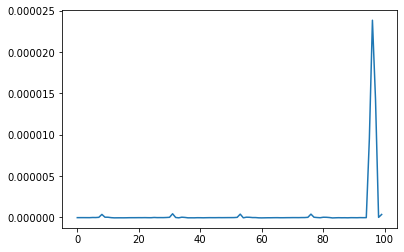

In [6]:
veh = '2'

# [(i,round(gaussian_entropy(data[veh][i][:],bdw=0.275),4)) for i in range(len(data[veh]))]
plt.plot((np.array(data[veh][40][:])))
plt.show()

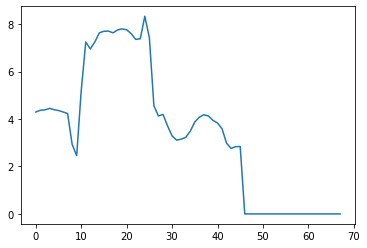

In [37]:
def mean_variance(data, beta=3):
    # Add Mean Variance with Absolute data
    return np.mean(abs(np.array(data).squeeze())) + beta*np.var(np.array(data).squeeze())

# mean_variance = lambda data,beta: np.mean(data) + beta*np.var(data)
veh = '0'
# [(i,round(mean_variance(data[veh][i][:], 10),4)) for i in range(len(data[veh]))]
plt.plot([mean_variance(data[veh][i][:], 3) for i in range(len(data[veh]))])
plt.show()

In [8]:
data['3'][-45][:50]

[[2.3894498015764043e-05],
 [3.8121613141761657e-05],
 [3.810954910310471e-05],
 [2.1502787039828775e-05],
 [-1.6670502782645258e-05],
 [-5.250089081698661e-05],
 [-7.62716675017927e-05],
 [-5.717608437816324e-05],
 [-9.594115990552154e-06],
 [5.48623767349099e-05],
 [0.00011441749911078603],
 [0.00012876805309591788],
 [9.29409020944405e-05],
 [-4.72475437440778e-06],
 [-0.00013586494999273668],
 [-0.00023609752605402434],
 [-0.00024792119652339295],
 [-0.00014782787354228333],
 [6.19491338538225e-05],
 [0.0003028390975545747],
 [0.0004029285243989378],
 [0.0003171104245724976],
 [0.0001313069688757551],
 [-0.00017411767915476162],
 [-0.0003839651421300161],
 [-0.000462635626514718],
 [-0.0004553372307336545],
 [-0.00020518740199815255],
 [0.00022400661697563606],
 [0.000522134981983946],
 [0.0006436998632430857],
 [0.0006389191985256559],
 [0.0003600240552570355],
 [-0.0001907594894845488],
 [-0.0008678954336494016],
 [-0.0013280294568485118],
 [-0.0012660425427180044],
 [-0.00053408

In [9]:
hist, bin_edges = np.histogram(np.array(data['3'][-45][:50]).squeeze(), bins=10, density=True)
# print('hist:',hist)
# print('bin_edges:',bin_edges)
prob = hist[hist > 0]
# print('prob:',prob)
ent_histogram = -(prob*np.log(np.abs(prob))).sum()
print('entropy',ent_histogram)

entropy -3773.0688148462914


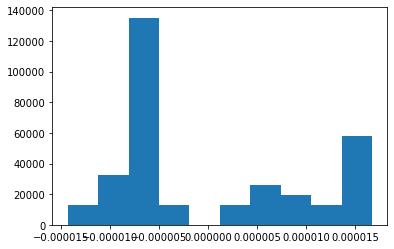

In [10]:
plt.hist(np.array(data['3'][-5][:50]).squeeze(), bins=10, density=True)
plt.show()

In [11]:
# np.array(data['0'][0][:50]).squeeze()

In [12]:
# print("result2:", [ee.entropy([[7] for i in range(1000)], k=j + 1) for j in range(5)])
print("result2:", ee.entropy([[7] for i in range(1000)],3))

result2: -33.258773800241485


In [35]:
differential_entropy(np.array(data['0'][-5][:]).squeeze(), method='auto')

-15.760523969501765

In [32]:
def gaussian_entropy(data_entropy, bdw=0.25):
    kde = KernelDensity(kernel='gaussian', bandwidth=bdw).fit(data_entropy)

    log_p = kde.score_samples(data_entropy)  # returns log(p) of data sample
    p = np.exp(log_p)                # estimate p of data sample
    entropy = -np.sum(p*log_p)       # evaluate entropy
    
#     plt.hist(data_entropy.squeeze(), bins=10, density=True)
#     plt.plot(data_entropy,p,'kx')
#     plt.show()
    
    return entropy*(entropy>0)


veh = '0'
timestep = -25

data_entropy = data[veh][timestep][:]

print('Entropy:', gaussian_entropy(data_entropy, bdw=0.3))

Entropy: 24.858231598368874


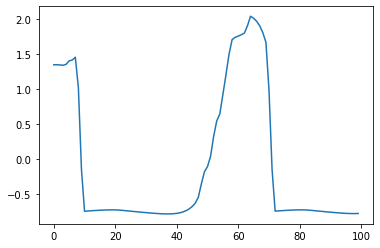

In [28]:
veh = '0'

# [(i,round(gaussian_entropy(data[veh][i][:],bdw=0.275),4)) for i in range(len(data[veh]))]
plt.plot((np.array(data[veh][35][:])))
plt.show()

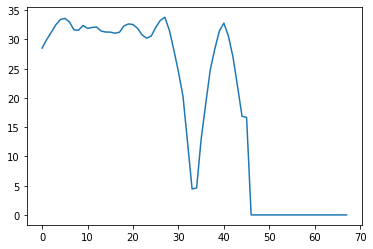

In [33]:
veh = '0'

# [(i,round(gaussian_entropy(data[veh][i][:],bdw=0.275),4)) for i in range(len(data[veh]))]
# plt.plot((np.array(data[veh][36][:])))
# plt.show()
plt.plot([gaussian_entropy(np.array(data[veh][i][:]),bdw=0.275) for i in range(len(data[veh]))])
plt.show()

VaR: 1.3442543591975742
CVaR: 1.3731496360252553


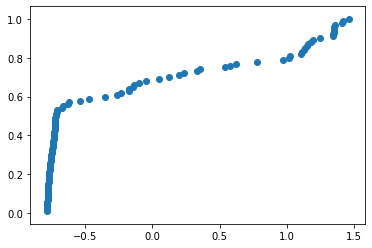

In [24]:
veh = '0'
timestep = -25

data_entropy = np.array(data[veh][timestep][:])

### ECDF, VaR and CVaR
ecdf_1 = sm.distributions.ECDF(data_entropy.squeeze())
# plt.step(ecdf_1.x,ecdf_1.y)

def ecdf(data):
    """ Compute ECDF """
    ecdf_x = np.sort(data)
    n = ecdf_x.size
    ecdf_y = np.arange(1, n+1) / n
    return(ecdf_x, ecdf_y)

x,y = ecdf(data_entropy.squeeze())
plt.scatter(x=x, y=y)

def VaR(ecdf_x,ecdf_y, alpha):
    ind = np.searchsorted(ecdf_y, alpha, side='right')
    var = ecdf_x[ind]
    cvar = np.mean(ecdf_x[ind:])
    return [var,cvar]

print('VaR:', VaR(x,y,alpha=0.9)[0])
print('CVaR:', VaR(x,y,alpha=0.9)[1])

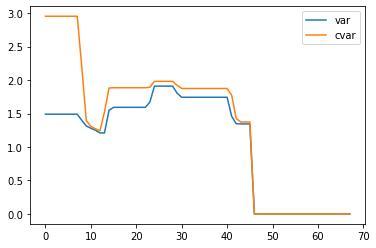

In [25]:
veh = '0'
var_list = []
cvar_list = []
for i in range(len(data[veh])):
    x,y = ecdf(np.array(data[veh][i][:]).squeeze())
#     print (i,round(VaR(x,y,alpha=0.9)[0],4),round(VaR(x,y,alpha=0.9)[1],4))
    var_list.append(VaR(x,y,alpha=0.9)[0])
    cvar_list.append(VaR(x,y,alpha=0.9)[1])
    
plt.plot(var_list, label='var')
plt.plot(cvar_list, label='cvar')
plt.legend()
plt.show()